In [1]:
#from google.colab import drive
#drive.mount('/content/drive')

## Laporan secara singkat dapat diakses pada link ini <a href="https://drive.google.com/file/d/1bJjCL_1gShJQdMtZp8ASO50y8FIC6ATp/view?usp=drivesdk">PDF</a>

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import warnings
warnings.filterwarnings('ignore')

# Read Dataset

In [3]:
# Read CSV tanpa gdrive
df = pd.read_csv('flight.csv')

In [4]:
df.sample(10)

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER   WORK_CITY  \
14459      44070   7/29/2011        11/26/2011    Male         4    shenyang   
30634      41652   8/28/2011         8/28/2011    Male         4      dalian   
58437      31994   3/26/2011         3/26/2011    Male         4   zhengzhou   
44603       4992    1/6/2011          1/6/2011  Female         4    shanghai   
38885      43731   6/20/2010         9/29/2010  Female         4   changchun   
27560      54756   5/29/2006         6/19/2006    Male         4      foshan   
55690      25551   3/26/2013         8/11/2013    Male         4  shantoushi   
12914      20642  12/10/2007        12/15/2007    Male         4     shantou   
4538        8978   1/14/2012         2/15/2012  Female         5   guangzhou   
28131      47938   1/27/2008         3/18/2008    Male         4     beijing   

      WORK_PROVINCE WORK_COUNTRY   AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
14459      liaoning           CN  46.0  3/31/2014  ...    4106.0       21021   
30634      liaoning           CN  32.0  3/31/2014  ...    1122.0       14652   
58437         henan           CN  66.0  3/31/2014  ...     570.0        1926   
44603      shanghai           CN  33.0  3/31/2014  ...     346.0        4732   
38885         jilin           CN  56.0  3/31/2014  ...    2480.0        9331   
27560     guangdong           CN  46.0  3/31/2014  ...    4054.0       11352   
55690     guangdong           CN  48.0  3/31/2014  ...    1783.0        2243   
12914     guangdong           CN  40.0  3/31/2014  ...    9396.0       28735   
4538      guangdong           CN  36.0  3/31/2014  ...   20297.0       50814   
28131       beijing           CN  41.0  3/31/2014  ...       0.0       11338   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
14459         8/23/2013          222     27.500000          100   
30634        11/14/2013          139     61.222222          220   
58437         5/23/2013          314    121.000000          121   
44603         2/16/2014           45    225.000000          319   
38885         4/28/2013          339     52.000000          198   
27560         8/26/2013          219     50.300000          118   
55690         8/14/2013          231      3.000000            3   
12914         2/23/2014           38     23.703704          135   
4538          3/17/2014           15     17.794872           91   
28131         3/31/2013          367     68.000000          175   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
14459               0      0.781568       12541                0  
30634               0      0.495497        5801                6  
58437               0      0.784216        1219                0  
44603               0      0.781036        3067                0  
38885               0      0.525399        3424                0  
27560               0      0.738893       55986                6  
55690               0      0.850049        2109                0  
12914               1      0.628369       16811                1  
4538                0      0.707739       33497                1  
28131               0      0.720021        8137                1  

[10 rows x 23 columns]

In [5]:
#link= '/content/drive/My Drive/DS 29 - Rakamin Final Project/PR Unsupervised Learning/flight.csv'

In [6]:
#!ls '/content/drive/My Drive/DS 29 - Rakamin Final Project/PR Unsupervised Learning/flight.csv'

In [7]:
#df = pd.read_csv(link)
#df

# Data Preprocessing

## Handle Mising Value

In [8]:
df.isna().sum()

MEMBER_NO               0
FFP_DATE                0
FIRST_FLIGHT_DATE       0
GENDER                  3
FFP_TIER                0
WORK_CITY            2269
WORK_PROVINCE        3248
WORK_COUNTRY           26
AGE                   420
LOAD_TIME               0
FLIGHT_COUNT            0
BP_SUM                  0
SUM_YR_1              551
SUM_YR_2              138
SEG_KM_SUM              0
LAST_FLIGHT_DATE        0
LAST_TO_END             0
AVG_INTERVAL            0
MAX_INTERVAL            0
EXCHANGE_COUNT          0
avg_discount            0
Points_Sum              0
Point_NotFlight         0
dtype: int64

In [9]:
df = df.drop_duplicates()

In [10]:
df = df.dropna()

In [11]:
df.isna().sum()

MEMBER_NO            0
FFP_DATE             0
FIRST_FLIGHT_DATE    0
GENDER               0
FFP_TIER             0
WORK_CITY            0
WORK_PROVINCE        0
WORK_COUNTRY         0
AGE                  0
LOAD_TIME            0
FLIGHT_COUNT         0
BP_SUM               0
SUM_YR_1             0
SUM_YR_2             0
SEG_KM_SUM           0
LAST_FLIGHT_DATE     0
LAST_TO_END          0
AVG_INTERVAL         0
MAX_INTERVAL         0
EXCHANGE_COUNT       0
avg_discount         0
Points_Sum           0
Point_NotFlight      0
dtype: int64

## Change Datatype

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58255 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          58255 non-null  int64  
 1   FFP_DATE           58255 non-null  object 
 2   FIRST_FLIGHT_DATE  58255 non-null  object 
 3   GENDER             58255 non-null  object 
 4   FFP_TIER           58255 non-null  int64  
 5   WORK_CITY          58255 non-null  object 
 6   WORK_PROVINCE      58255 non-null  object 
 7   WORK_COUNTRY       58255 non-null  object 
 8   AGE                58255 non-null  float64
 9   LOAD_TIME          58255 non-null  object 
 10  FLIGHT_COUNT       58255 non-null  int64  
 11  BP_SUM             58255 non-null  int64  
 12  SUM_YR_1           58255 non-null  float64
 13  SUM_YR_2           58255 non-null  float64
 14  SEG_KM_SUM         58255 non-null  int64  
 15  LAST_FLIGHT_DATE   58255 non-null  object 
 16  LAST_TO_END        582

Ada beberapa datatype yang tidak sesuai seperti:
- 'FFP_DATE' -> Date
- 'FIRST_FLIGHT_DATE' -> Date
- 'LAST_FLIGHT_DATE' -> Date
- 'LOAD_TIME' -> Date
- Age -> Int


In [13]:
df['AGE'] = df['AGE'].astype(int)

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58255 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          58255 non-null  int64  
 1   FFP_DATE           58255 non-null  object 
 2   FIRST_FLIGHT_DATE  58255 non-null  object 
 3   GENDER             58255 non-null  object 
 4   FFP_TIER           58255 non-null  int64  
 5   WORK_CITY          58255 non-null  object 
 6   WORK_PROVINCE      58255 non-null  object 
 7   WORK_COUNTRY       58255 non-null  object 
 8   AGE                58255 non-null  int32  
 9   LOAD_TIME          58255 non-null  object 
 10  FLIGHT_COUNT       58255 non-null  int64  
 11  BP_SUM             58255 non-null  int64  
 12  SUM_YR_1           58255 non-null  float64
 13  SUM_YR_2           58255 non-null  float64
 14  SEG_KM_SUM         58255 non-null  int64  
 15  LAST_FLIGHT_DATE   58255 non-null  object 
 16  LAST_TO_END        582

In [15]:
df[df['LAST_FLIGHT_DATE']=='2014/2/29  0:00:00']
df['LAST_FLIGHT_DATE'] = df['LAST_FLIGHT_DATE'].replace('2014/2/29  0:00:00', '2/29/2014')

In [16]:
df[df['LAST_FLIGHT_DATE']=='2/29/2014']

MEMBER_NO    FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER  WORK_CITY  \
248        56497   6/17/2007         6/17/2007  Female         6  guangzhou   
447        17306   8/26/2009         4/29/2010    Male         5    haerbin   
473          915  11/10/2006         1/26/2007    Male         5          .   
832        20336   7/13/2005          8/6/2005    Male         5  guangzhou   
1051       62884   5/24/2006         4/21/2007    Male         5      wuhan   
...          ...         ...               ...     ...       ...        ...   
61388       4076    4/8/2009         4/11/2009    Male         4   wulumuqi   
61539      55995   1/11/2013         7/10/2013    Male         4  dalianshi   
61871      48742   7/26/2009         7/26/2009    Male         4    tianjin   
61909       9190   4/11/2011         4/20/2011    Male         4  guangzhou   
62721      38776  10/31/2007         3/13/2008    Male         4     foshan   

      WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
248       guangdong           CN   46  3/31/2014  ...   70845.0       85000   
447    heilongjiang           CN   70  3/31/2014  ...   46323.0       69453   
473         beijing           CN   39  3/31/2014  ...   30580.0       65717   
832       guangdong           CN   40  3/31/2014  ...   36417.0      114222   
1051          hubei           CN   50  3/31/2014  ...   35680.0       49859   
...             ...          ...  ...        ...  ...       ...         ...   
61388      xinjiang           CN   45  3/31/2014  ...     783.0        3243   
61539      liaoning           CN   23  3/31/2014  ...     955.0        3513   
61871       tianjin           CN   37  3/31/2014  ...     966.0        1298   
61909     guangdong           CN   34  3/31/2014  ...     853.0        2595   
62721     guangdong           CN   42  3/31/2014  ...     688.0        1199   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
248           2/29/2014           32     13.250000           57   
447           2/29/2014           32     22.766667           75   
473           2/29/2014           32     14.250000           65   
832           2/29/2014           32      8.696203           34   
1051          2/29/2014           32     19.115385           72   
...                 ...          ...           ...          ...   
61388         2/29/2014           32    459.000000          459   
61539         2/29/2014           32    117.000000          211   
61871         2/29/2014           32    135.000000          135   
61909         2/29/2014           32      1.000000            1   
62721         2/29/2014           32     78.000000           78   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
248                 0      1.373478      132653                4  
447                 6      1.375395      101413                7  
473                 1      1.425974       93153                8  
832                 2      0.664970       91476               15  
1051                4      1.388584       69047                4  
...               ...           ...         ...              ...  
61388               1      0.308511        2180                2  
61539               0      0.276667           0                0  
61871               0      0.690000        1094                1  
61909               0      0.340000        3356               19  
62721               0      0.489525         276                0  

[395 rows x 23 columns]

In [17]:
date = ['FFP_DATE', 'FIRST_FLIGHT_DATE','LAST_FLIGHT_DATE', 'LOAD_TIME']
#df['LAST_FLIGHT_DATE'] = pd.to_datetime(df['LAST_FLIGHT_DATE'], format='%m/%d/%Y')

for i in date:
  df[i] = pd.to_datetime(df[i], format='%m/%d/%Y', errors='coerce')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 58255 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          58255 non-null  int64         
 1   FFP_DATE           58255 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  58255 non-null  datetime64[ns]
 3   GENDER             58255 non-null  object        
 4   FFP_TIER           58255 non-null  int64         
 5   WORK_CITY          58255 non-null  object        
 6   WORK_PROVINCE      58255 non-null  object        
 7   WORK_COUNTRY       58255 non-null  object        
 8   AGE                58255 non-null  int32         
 9   LOAD_TIME          58255 non-null  datetime64[ns]
 10  FLIGHT_COUNT       58255 non-null  int64         
 11  BP_SUM             58255 non-null  int64         
 12  SUM_YR_1           58255 non-null  float64       
 13  SUM_YR_2           58255 non-null  float64       
 14  SEG_KM

Karena pada conversi ke Date menggunakan 'errors='coerce' maka pasti ada data yang NaN jika formatnya tidak sesuai

In [19]:
df.isna().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 0
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           0
AGE                    0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1               0
SUM_YR_2               0
SEG_KM_SUM             0
LAST_FLIGHT_DATE     395
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

Data pada LAST_FLIGHT_DATE yang tidak sesuai format adalah tanggal 29 Februari 2014 karena di awal sudah dilakukan pengecekan jumlah pada data tersebut dan jumlah datanya sama. Data pada tanggal tersebut memang tidak terdapat dalam penanggalan kalender kabisat, sehingga wajar saja jika formatnya tidak sesuai.

In [20]:
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 57860 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          57860 non-null  int64         
 1   FFP_DATE           57860 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  57860 non-null  datetime64[ns]
 3   GENDER             57860 non-null  object        
 4   FFP_TIER           57860 non-null  int64         
 5   WORK_CITY          57860 non-null  object        
 6   WORK_PROVINCE      57860 non-null  object        
 7   WORK_COUNTRY       57860 non-null  object        
 8   AGE                57860 non-null  int32         
 9   LOAD_TIME          57860 non-null  datetime64[ns]
 10  FLIGHT_COUNT       57860 non-null  int64         
 11  BP_SUM             57860 non-null  int64         
 12  SUM_YR_1           57860 non-null  float64       
 13  SUM_YR_2           57860 non-null  float64       
 14  SEG_KM

In [21]:
df['WORK_CITY'] = df['WORK_CITY'].replace('.', 'other')
df['WORK_PROVINCE'] = df['WORK_PROVINCE'].replace('.', 'other')

In [22]:
df[df['WORK_PROVINCE']=='other']

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER   WORK_CITY  \
11         37994 2004-11-13        2004-12-02    Male         6     beijing   
59         11034 2005-01-26        2005-03-09    Male         5     beijing   
536        21740 2010-03-01        2010-03-26    Male         4       other   
676         8346 2011-04-05        2011-05-27    Male         5  yisilanbao   
788        41908 2011-10-23        2011-10-23    Male         6     beijing   
...          ...        ...               ...     ...       ...         ...   
62118      61405 2013-03-24        2013-03-24    Male         4    shanghai   
62191      62222 2011-11-15        2012-04-01    Male         4     beijing   
62252      52651 2011-09-28        2013-05-11    Male         4    shanghai   
62733       4973 2011-01-15        2011-03-25    Male         4     beijing   
62982      16415 2013-01-20        2013-01-20  Female         4     beijing   

      WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
11            other           CN   47 2014-03-31  ...  126821.0      271438   
59            other           CN   59 2014-03-31  ...   85537.0      214921   
536           other           JP   46 2014-03-31  ...    7443.0       78595   
676           other           PK   53 2014-03-31  ...   31664.0       75213   
788           other           CN   53 2014-03-31  ...   34988.0       59280   
...             ...          ...  ...        ...  ...       ...         ...   
62118         other           CN   36 2014-03-31  ...       0.0        3321   
62191         other           CN   36 2014-03-31  ...       0.0        2307   
62252         other           CN   54 2014-03-31  ...     922.0        1359   
62733         other           CN   31 2014-03-31  ...       0.0        1158   
62982         other           CN   35 2014-03-31  ...       0.0        3848   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
11           2014-03-26            6      5.027778           42   
59           2014-03-11           21      9.133333           34   
536          2014-03-30            2     12.068966           69   
676          2014-01-31           61     18.028571          116   
788          2014-03-19           13     13.807692           90   
...                 ...          ...           ...          ...   
62118        2013-03-26          372      2.000000            2   
62191        2012-05-30          672     59.000000           59   
62252        2013-05-13          324      2.000000            2   
62733        2013-01-14          443     10.000000           10   
62982        2013-01-20          437      0.000000            0   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
11                 15      0.952535      353101               66  
59                  5      0.819187      190530               13  
536                 5      1.142706       88924                6  
676                 0      1.086663       78063                2  
788                 4      1.304835       73270                6  
...               ...           ...         ...              ...  
62118               0      0.250000           0                0  
62191               0      0.351105         331                0  
62252               0      0.581604         506                0  
62733               0      0.500000         200                0  
62982               0      0.000000           0                0  

[912 rows x 23 columns]

## EDA

### Statistic Data

In [23]:
# Statistic numeric
df.describe()

MEMBER_NO      FFP_TIER           AGE  FLIGHT_COUNT         BP_SUM  \
count  57860.000000  57860.000000  57860.000000  57860.000000   57860.000000   
mean   31543.210854      4.104666     42.233253     12.043000   11047.843726   
std    18182.130529      0.378206      9.763364     14.239523   16294.179086   
min        3.000000      4.000000      6.000000      2.000000       0.000000   
25%    15794.750000      4.000000     35.000000      3.000000    2599.750000   
50%    31591.500000      4.000000     41.000000      7.000000    5814.000000   
75%    47307.250000      4.000000     48.000000     15.000000   12976.250000   
max    62988.000000      6.000000    110.000000    213.000000  505308.000000   

            SUM_YR_1       SUM_YR_2     SEG_KM_SUM  LAST_TO_END  AVG_INTERVAL  \
count   57860.000000   57860.000000   57860.000000  57860.00000  57860.000000   
mean     5363.816955    5679.279658   17324.371863    172.20598     67.963638   
std      8110.434363    8714.783954   20982.734648    180.80718     77.533059   
min         0.000000       0.000000     368.000000      1.00000      0.000000   
25%      1020.000000     833.000000    4882.000000     28.00000     23.666667   
50%      2804.000000    2830.000000   10208.000000    105.00000     44.812500   
75%      6584.000000    6931.000000   21519.000000    259.25000     82.000000   
max    239560.000000  234188.000000  580717.000000    731.00000    728.000000   

       MAX_INTERVAL  EXCHANGE_COUNT  avg_discount     Points_Sum  \
count  57860.000000    57860.000000  57860.000000   57860.000000   
mean     167.221673        0.327981      0.720626   12721.368960   
std      122.901236        1.149762      0.183942   20621.601695   
min        0.000000        0.000000      0.000000       0.000000   
25%       81.000000        0.000000      0.612019    2863.000000   
50%      144.000000        0.000000      0.711429    6468.000000   
75%      228.000000        0.000000      0.808333   14491.000000   
max      728.000000       46.000000      1.500000  985572.000000   

       Point_NotFlight  
count     57860.000000  
mean          2.819703  
std           7.497873  
min           0.000000  
25%           0.000000  
50%           0.000000  
75%           1.000000  
max         140.000000

Dari data numerik, terdapat hal yang aneh pada fitur avg_discount. Fitur tersebut memiliki nilai max 1.5 jika dipersenkan itu sama dengan 150%, sedangkan diskon seharusnya berkisar <= 100%.

In [24]:
# Statistic Categorical
cats = []

for i in df.columns:
  if df[i].dtypes == 'object':
    cats.append(i)

df[cats].describe()

GENDER  WORK_CITY WORK_PROVINCE WORK_COUNTRY
count   57860      57860         57860        57860
unique      2       2935          1123          105
top      Male  guangzhou     guangdong           CN
freq    44127       9223         17215        54572

### Distribution Plot

<Figure size 1080x1080 with 0 Axes>

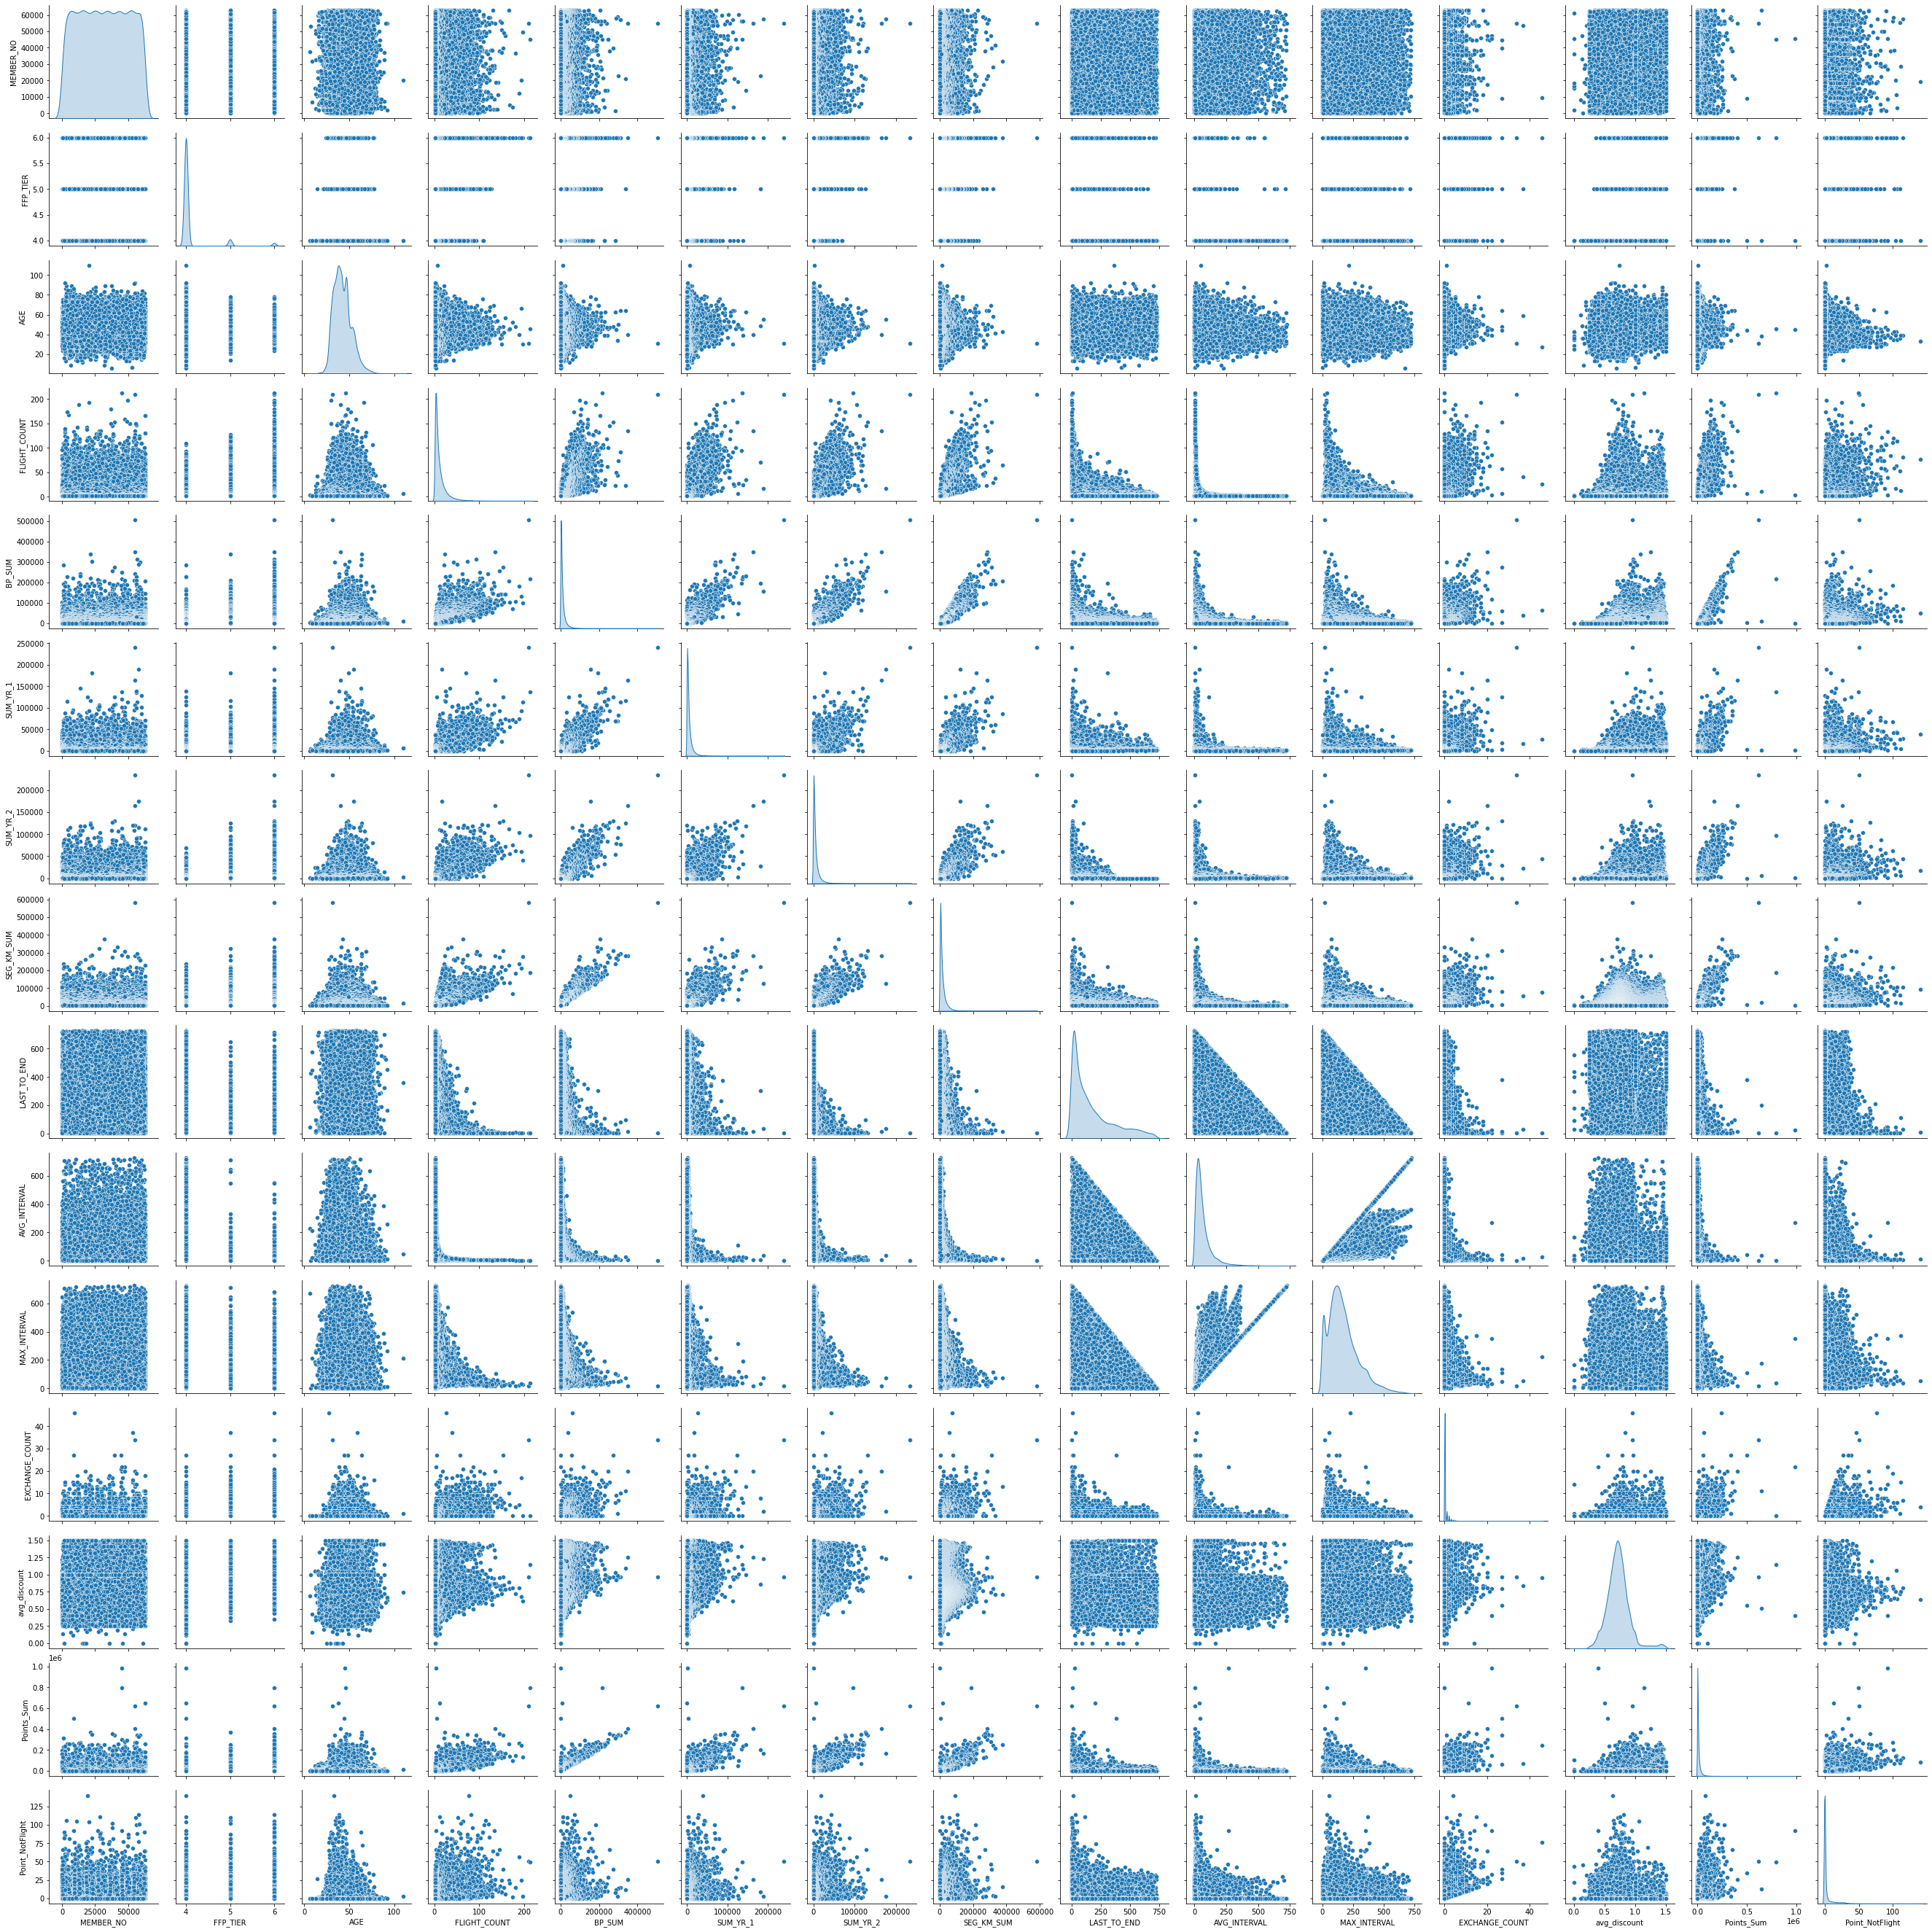

In [25]:
# Pada keseluruhan data
plt.figure(figsize=(15,15))
sns.pairplot(df,  diag_kind='kde')

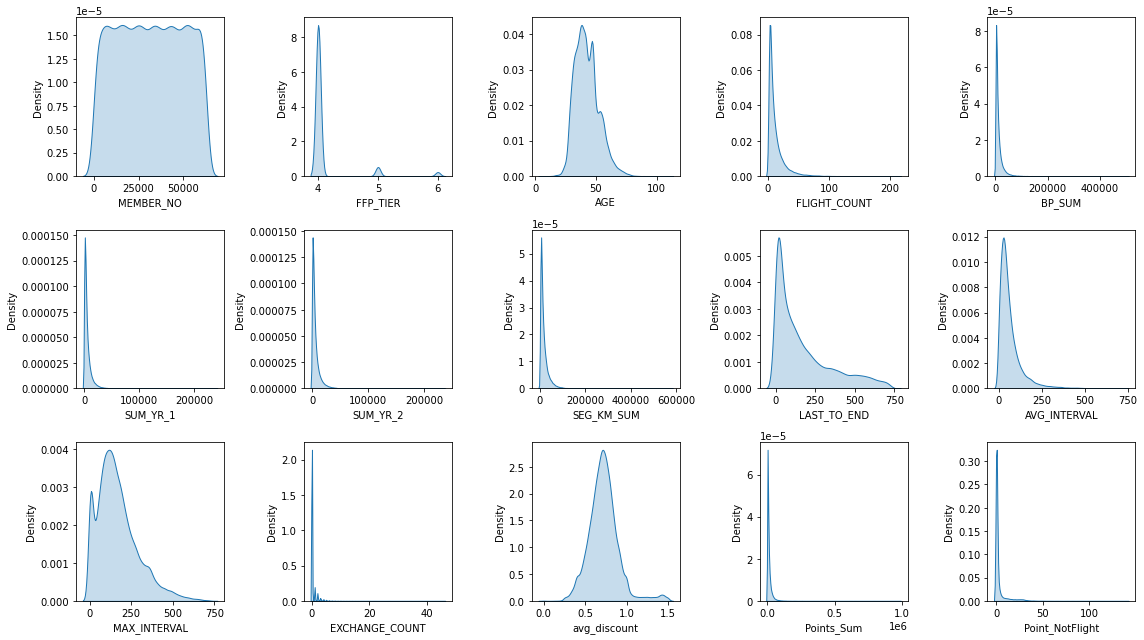

In [26]:
# Pada data numerikal
nums = df.select_dtypes(include=[np.number], exclude=[np.bool]).columns
plt.figure(figsize=(16,9))
for i in range(0, len(nums)):
    plt.subplot(3,5, i+1)
    sns.kdeplot(data=df, x=df[nums[i]], fill='True')
    plt.tight_layout()

Fitur avg_discount memiliki nilai lebih dari 1 (100%), sehingga akan dilakukan drop pada fitur tersebut yang memiliki nilai lebih dari 1.

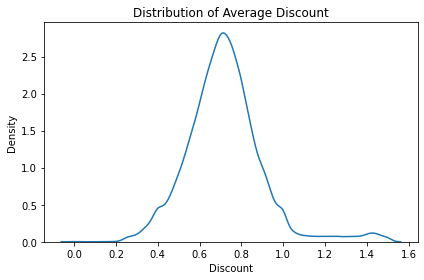

In [27]:
# Melihat kde plot pada fitur avg_discount
ax = sns.kdeplot(x = df['avg_discount'])
ax.set_title("Distribution of Average Discount")
ax.set_ylabel("Density")
ax.set_xlabel("Discount")
plt.tight_layout()

In [28]:
# drop data pada fitur avg_discount yang memiliki fitur lebih dari 1
df = df[df['avg_discount']<=1]

In [29]:
df.sample(10)

MEMBER_NO   FFP_DATE FIRST_FLIGHT_DATE  GENDER  FFP_TIER   WORK_CITY  \
27969      12579 2009-02-13        2012-04-30    Male         4     beijing   
54704      21823 2009-01-13        2009-01-13    Male         4      yantai   
14840      50803 2011-12-09        2011-12-09    Male         4     haerbin   
29555       9706 2006-06-13        2006-10-19    Male         4    shenzhen   
46456      31094 2009-07-20        2011-01-01    Male         4        wuxi   
20026      27372 2011-11-30        2012-02-17    Male         4     beijing   
29955      28233 2007-06-19        2007-08-14    Male         4   guangzhou   
38291      17540 2011-09-13        2012-03-04    Male         4  lanzhoushi   
15636      41020 2012-01-22        2012-01-22  Female         4   guangzhou   
7374       48570 2008-10-15        2012-01-04    Male         5     taiyuan   

      WORK_PROVINCE WORK_COUNTRY  AGE  LOAD_TIME  ...  SUM_YR_2  SEG_KM_SUM  \
27969       beijing           CN   32 2014-03-31  ...     815.0        9894   
54704      shandong           CN   48 2014-03-31  ...     458.0        3003   
14840  heilongjiang           CN   40 2014-03-31  ...    5061.0       25391   
29555     guangdong           CN   45 2014-03-31  ...    5046.0       11261   
46456       jiangsu           CN   45 2014-03-31  ...    1171.0        5327   
20026       beijing           CN   34 2014-03-31  ...    7700.0       15206   
29955     guangdong           CN   35 2014-03-31  ...    3331.0       11534   
38291         gansu           CN   56 2014-03-31  ...    1455.0        7674   
15636     guangdong           CN   37 2014-03-31  ...    4400.0       25398   
7374         shanxi           CN   41 2014-03-31  ...   11377.0       28435   

       LAST_FLIGHT_DATE  LAST_TO_END  AVG_INTERVAL MAX_INTERVAL  \
27969        2014-01-03           89    122.600000          324   
54704        2013-12-18          105    228.000000          401   
14840        2013-12-10          113    157.333333          457   
29555        2014-03-20           12     86.714286          197   
46456        2013-10-27          157     69.750000          146   
20026        2014-03-22           10     69.700000          166   
29955        2014-03-16           16    108.800000          178   
38291        2013-12-07          116    115.400000          233   
15636        2013-12-20          103     77.875000          178   
7374         2014-03-04           28     17.350000           64   

       EXCHANGE_COUNT  avg_discount  Points_Sum  Point_NotFlight  
27969               0      0.831090        7718                0  
54704               0      0.683430        1863                0  
14840               0      0.633636       16080                1  
29555               0      0.678638        5826                0  
46456               0      0.631094        2453                0  
20026               0      0.802890       22678               24  
29955               2      0.650220        7545                2  
38291               0      0.656457        4065                0  
15636               0      0.605556       14178                0  
7374                0      0.947857       26808                0  

[10 rows x 23 columns]

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55236 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          55236 non-null  int64         
 1   FFP_DATE           55236 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  55236 non-null  datetime64[ns]
 3   GENDER             55236 non-null  object        
 4   FFP_TIER           55236 non-null  int64         
 5   WORK_CITY          55236 non-null  object        
 6   WORK_PROVINCE      55236 non-null  object        
 7   WORK_COUNTRY       55236 non-null  object        
 8   AGE                55236 non-null  int32         
 9   LOAD_TIME          55236 non-null  datetime64[ns]
 10  FLIGHT_COUNT       55236 non-null  int64         
 11  BP_SUM             55236 non-null  int64         
 12  SUM_YR_1           55236 non-null  float64       
 13  SUM_YR_2           55236 non-null  float64       
 14  SEG_KM

**Tambahan** <br>
Membersihkan data sesuai dengan prosedur standar untuk dataset penerbangan 
- Record di mana harga tiket (SUM_YR_1,SUM_YR_2) berisi nilai 0, dan diskon rata-rata (avg_discount) bukan nol, dan dimana total jarak tempuh (SEG_KM_SUM) lebih dari nol.
- Hal ini diasumsikan bahwa user tidak memiliki riwayat perjalanan

In [31]:
# drop kolom
df.drop(df[(df['SUM_YR_1'] == 0) & (df['SUM_YR_2'] == 0) & (df['avg_discount'] == 0) & (df['SEG_KM_SUM'] > 0)].index, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55229 entries, 0 to 62978
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          55229 non-null  int64         
 1   FFP_DATE           55229 non-null  datetime64[ns]
 2   FIRST_FLIGHT_DATE  55229 non-null  datetime64[ns]
 3   GENDER             55229 non-null  object        
 4   FFP_TIER           55229 non-null  int64         
 5   WORK_CITY          55229 non-null  object        
 6   WORK_PROVINCE      55229 non-null  object        
 7   WORK_COUNTRY       55229 non-null  object        
 8   AGE                55229 non-null  int32         
 9   LOAD_TIME          55229 non-null  datetime64[ns]
 10  FLIGHT_COUNT       55229 non-null  int64         
 11  BP_SUM             55229 non-null  int64         
 12  SUM_YR_1           55229 non-null  float64       
 13  SUM_YR_2           55229 non-null  float64       
 14  SEG_KM

## Feature Selection

<AxesSubplot:>

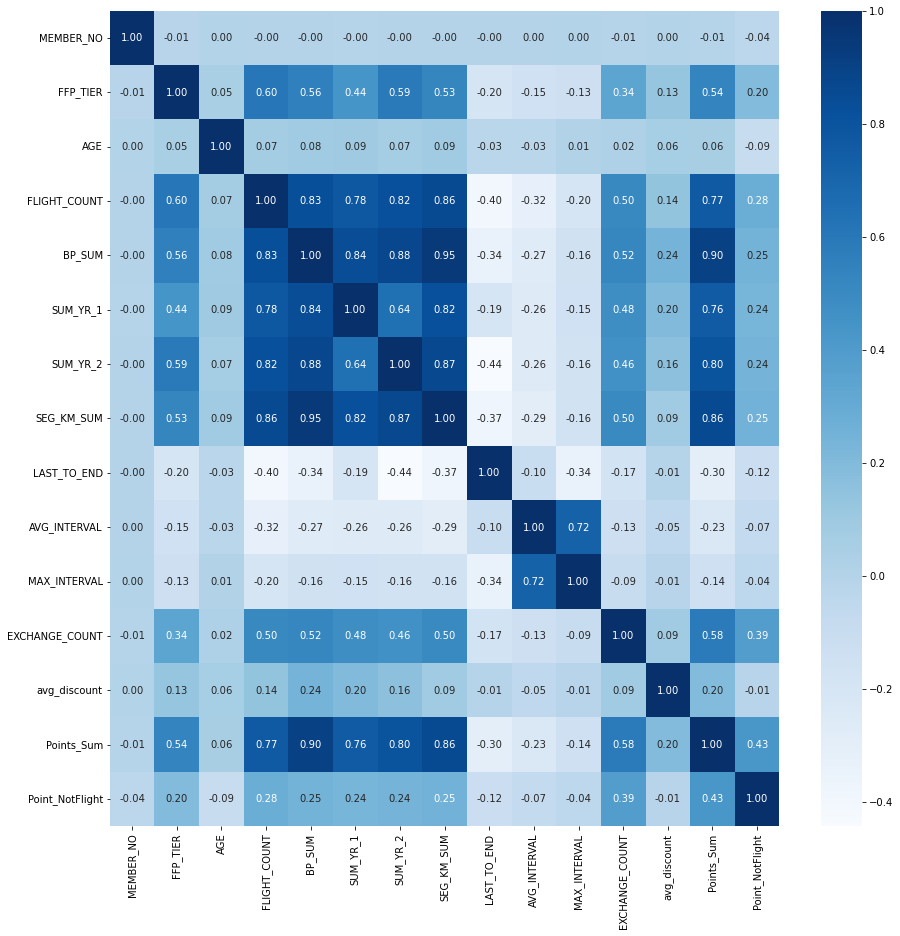

In [32]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Fitur yang tidak memiliki pengaruh tidak signifikan, yaitu nilai korelasinya yang kurang dari 0.05 adalah fitur MEMBER_NO terhadap fitur lainnya, maka akan didrop.

In [33]:
df = df.drop(['MEMBER_NO'], axis=1)

<AxesSubplot:>

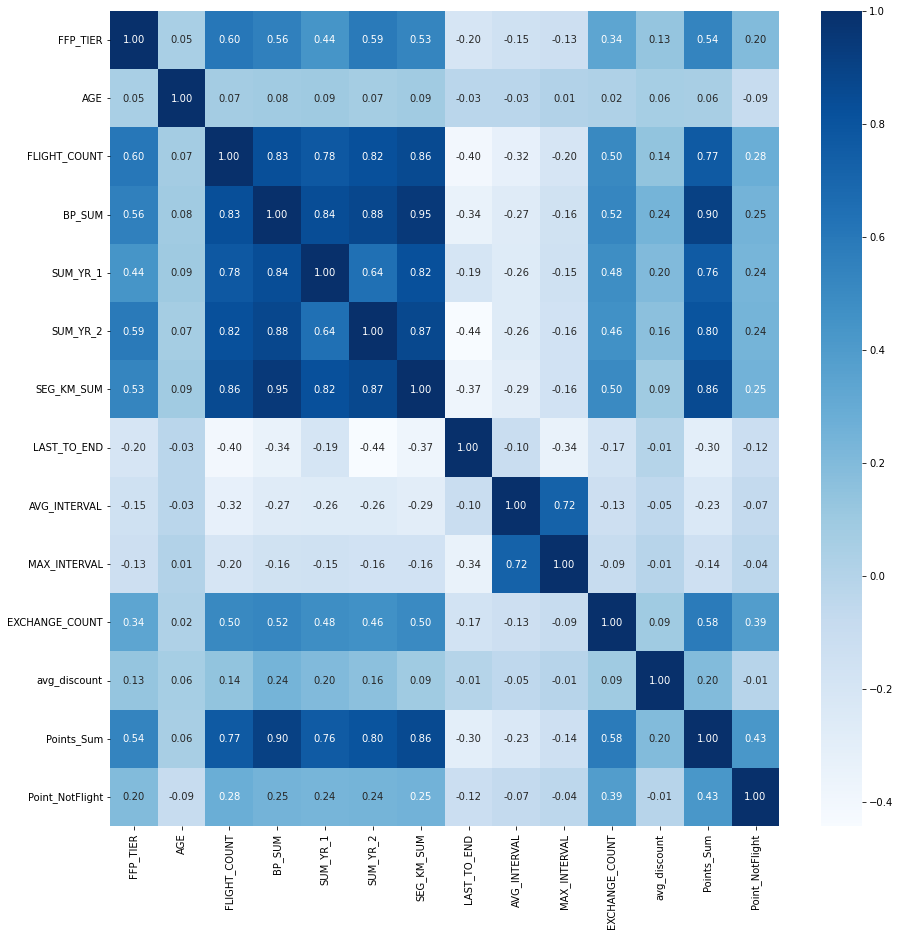

In [34]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Blues', annot=True, fmt='.2f')

Selanjutnya, berdasarkan dua jurnal mengenai airline passenger, yaitu:
- https://iopscience.iop.org/article/10.1088/1742-6596/1168/3/032086/pdf
- https://www.ijser.in/archives/v10i5/SE22525122734.pdf

data ini akan menggunakan model LRFMC. Dengan penjelasan:
- L (LOYALTY) : Lama waktu passenger menjadi membership (dalam bulan) dalam diketahui dari selisih dari waktu observasi dengan waktu menjadi membership.
- R (RECENCY) : Jumlah bulan sejak penerbangan terakhir passenger dari akhir waktu observasi.
- F (FREQUENCY) : Total berapa kali passenger telah terbang selama periode observasi.
- M (MONETERY) : Miles atau jarak yang terakumulasi selama waktu observasi passenger.
- C (DISCOUNT) : Nilai rata-rata discount factor yang digunakan passenger selama periode observasi.

Maka feature yang diambil :
- FFP_DATE (Frequent Flyer Program Join Date)
- LOAD_TIME (Tanggal Data diambil)
- FLIGHT_COUNT (Jumlah Penerbangan Passenger)
- avg_discount (Rata-rata Discount yang Didapat Passenger)
- SEG_KM_SUM (Total Jarak (km) Penerbangan yang Sudah Dilakukan)
- LAST_TO_END (Jarak Waktu Penerbangan Terakhir ke Pesanan Penerbangan Paling Terakhir)

In [35]:
# Fitur yang dipilih
feature = ['FFP_DATE', 'LOAD_TIME', 'FLIGHT_COUNT', 'avg_discount', 'SEG_KM_SUM', 'LAST_TO_END']

dfgo = df[feature].copy()

In [36]:
# Membuat fitur dari L (Loyalty) dari fitur yang telah dipilih)
dfgo['TIME_MONTH'] = ((dfgo['LOAD_TIME'] - dfgo['FFP_DATE']).dt.days/30).astype(int)

In [37]:
dfgo.sample(10)

FFP_DATE  LOAD_TIME  FLIGHT_COUNT  avg_discount  SEG_KM_SUM  \
39915 2013-03-28 2014-03-31             3      0.703315        6642   
4893  2011-07-05 2014-03-31            25      0.644503       53548   
14403 2011-06-12 2014-03-31             3      0.654452       25192   
21419 2012-11-13 2014-03-31            14      0.776319       14686   
28352 2005-02-09 2014-03-31            10      0.714494       11312   
60493 2011-06-16 2014-03-31             4      0.340000        3436   
28157 2007-09-17 2014-03-31            15      0.820861        9931   
30008 2011-06-24 2014-03-31            12      0.573656       13038   
1514  2007-07-21 2014-03-31            81      0.757902       78220   
52966 2009-11-16 2014-03-31             2      0.800000        2892   

       LAST_TO_END  TIME_MONTH  
39915          259          12  
4893            39          33  
14403          230          34  
21419          161          16  
28352           44         111  
60493          216          33  
28157          125          79  
30008          136          33  
1514             3          81  
52966          502          53

In [38]:
lrfmc = ['TIME_MONTH', 'LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']
dfgo_feat = dfgo[lrfmc].copy()
dfgo_feat.sample(10)

TIME_MONTH  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
25322          77          182             6       11635      0.805761
40490          17          399             3        4540      1.000000
60393          35          336             2        1224      0.971242
41831          17          218             4        5220      0.814943
33902          19          207            13        8758      0.710822
8866           20           90             3       36696      0.650000
10446          28            3            38       26578      0.800818
12632          38           22             9       20934      0.877184
60728          69           26             2        2055      0.550044
52556          18          541             2        5942      0.400000

## Handle Outlier

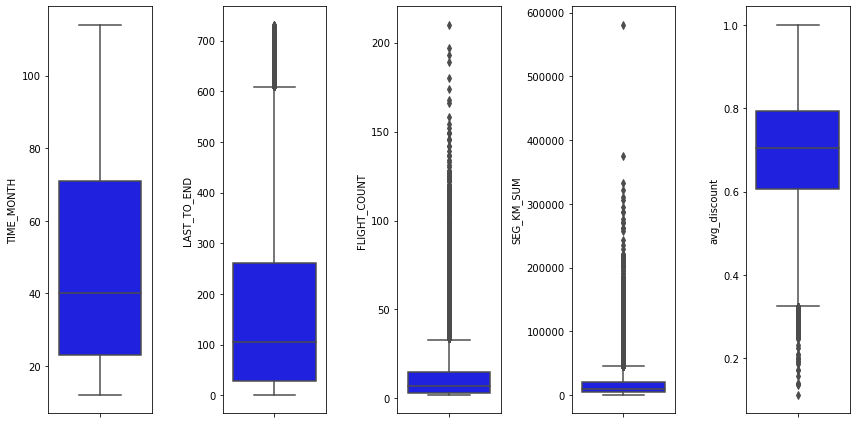

In [39]:
plt.figure(figsize=(12, 6))
for i in range(len(lrfmc)):
    plt.subplot(1, len(lrfmc), i+1)
    sns.boxplot(y=dfgo_feat[lrfmc[i]], color='blue', orient='v')
    plt.tight_layout()

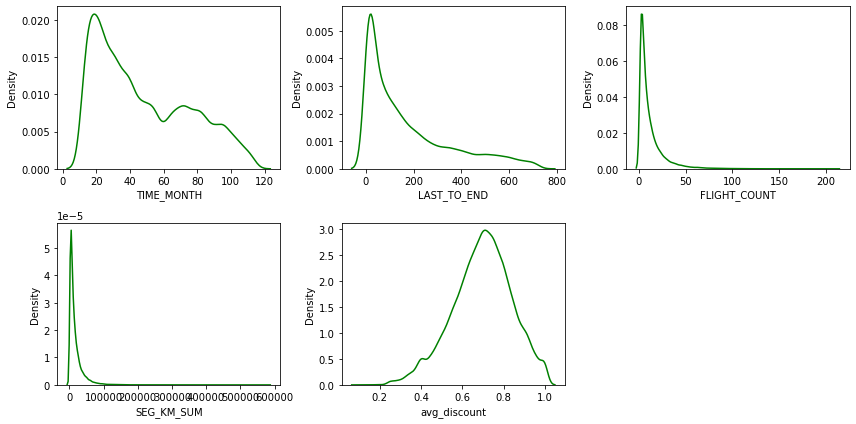

In [40]:
plt.figure(figsize=(12, 6))
for i in range(0, len(lrfmc)):
  plt.subplot(2, 3, i+1) # len(lrfmc), i+1
  sns.kdeplot(x=dfgo_feat[lrfmc[i]], color = 'green')
  plt.xlabel(lrfmc[i])
  plt.tight_layout()

## Percobaan Penghapusan Outlier Menggunakan Interquartile Range (IQR)

In [41]:
# Penghapusan outlier dengan IQR
print("Jumlah sebelum filter: ", len(dfgo_feat))

for i in lrfmc:
  Q1 = dfgo_feat[i].quantile(0.25)
  Q3 = dfgo_feat[i].quantile(0.75)
  IQR = Q3-Q1
  low_limit = Q1 - (1.5 * IQR)
  high_limit = Q3 + (1.5 * IQR)
  filtered_entries = ((dfgo_feat[i] >= low_limit) & (dfgo_feat[i] <= high_limit))
  dfgo_feat = dfgo_feat[filtered_entries]

print("Jumlah setelah filter:", len(dfgo_feat))

Jumlah sebelum filter:  55229
Jumlah setelah filter: 46589


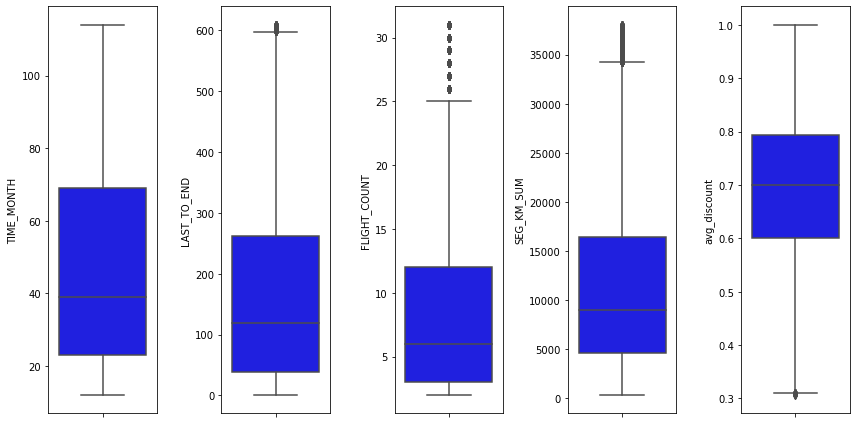

In [42]:
# Cek outlier lagi

plt.figure(figsize=(12, 6))
for i in range(len(lrfmc)):
    plt.subplot(1, len(lrfmc), i+1)
    sns.boxplot(y=dfgo_feat[lrfmc[i]], color='blue', orient='v')
    plt.tight_layout()

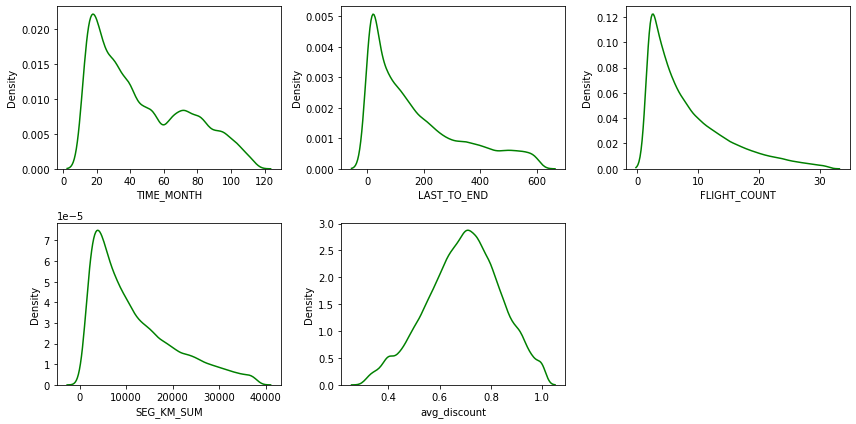

In [43]:
# Melihat sebaran data setelah handle outlier dengan iqr
plt.figure(figsize=(12, 6))
for i in range(0, len(lrfmc)):
  plt.subplot(2, 3, i+1) # len(lrfmc), i+1
  sns.kdeplot(x=dfgo_feat[lrfmc[i]], color = 'green')
  plt.xlabel(lrfmc[i])
  plt.tight_layout()

## Percobaan Menggunakan Transformation Log

In [44]:
# Assign nilai dataframe baru
lrfmc = ['TIME_MONTH', 'LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']
dfgo_feat = dfgo[lrfmc].copy()
dfgo_feat

TIME_MONTH  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
0              90            1           210      580717      0.961639
4              60            5           152      309928      0.970658
5              74           79            92      294585      0.967692
6              97            1           101      287042      0.965347
7              48            3            73      287230      0.962070
...           ...          ...           ...         ...           ...
62971          13          360             2        1096      0.250000
62972          39          180             2        1914      0.140000
62973          12          357             2         760      0.350000
62976          45           39             2        1062      0.225000
62978          36          282             2         760      0.280000

[55229 rows x 5 columns]

In [45]:
# Using transformation log

# And doing "shift-and-log" approach to makesure no data became infinite after log transformation
dfgo2 = pd.DataFrame()

for i in lrfmc:
  dfgo2[i] = dfgo_feat[i] + 0.001
  dfgo2[i] = np.log(dfgo2[i])

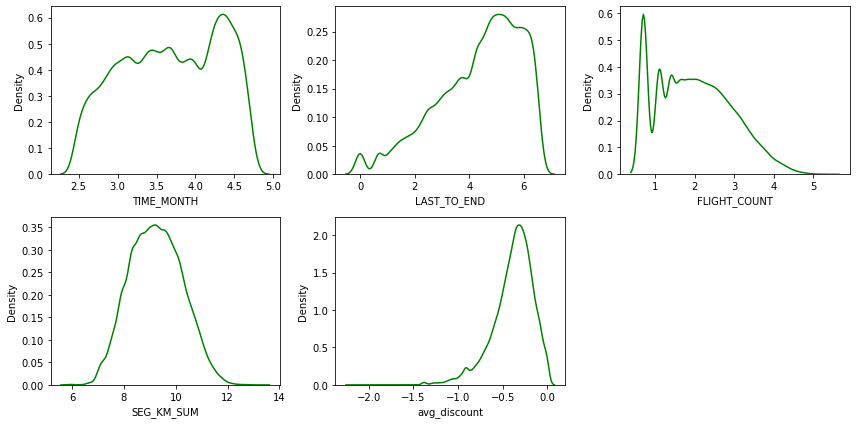

In [46]:
# Melihat sebaran data setelah di transform log
plt.figure(figsize=(12, 6))
for i in range(0, len(lrfmc)):
  plt.subplot(2, 3, i+1) # len(lrfmc), i+1
  sns.kdeplot(x=dfgo2[lrfmc[i]], color = 'green')
  plt.xlabel(lrfmc[i])
  plt.tight_layout()

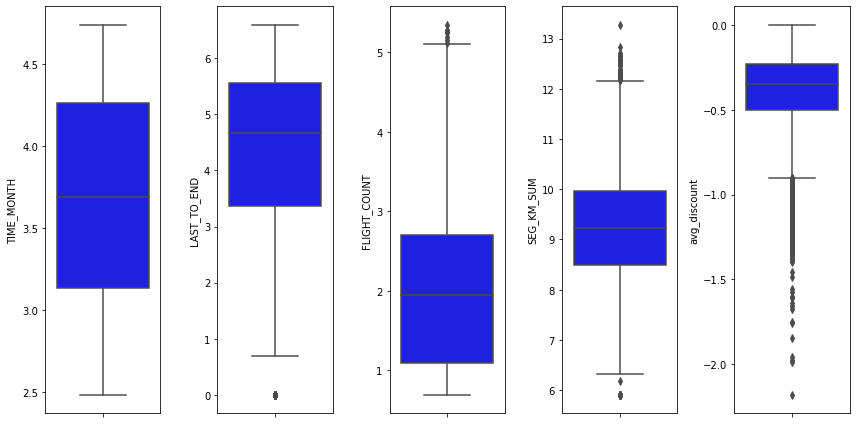

In [47]:
plt.figure(figsize=(12, 6))
for i in range(len(lrfmc)):
    plt.subplot(1, len(lrfmc), i+1)
    sns.boxplot(y=dfgo2[lrfmc[i]], color='blue', orient='v')
    plt.tight_layout()

## Keputusan Proses Outlier Akhir

Setelah melakukan beberapa iterasi, diputuskan melakukan beberapa proses berbeda dalam usaha menghilangkan extream value dan menormalkan sebaran, diantaranya:
- penghapusan outlier menggunakan IQR untuk ***avg_discount***
- Log Transformation untuk ***TIME_MONTH***, ***LAST_TO_END***, ***FLIGHT_COUNT***, ***SEG_KM_SUM***

In [48]:
# Assign nilai baru ke dataframe
lrfmc = ['TIME_MONTH', 'LAST_TO_END','FLIGHT_COUNT','SEG_KM_SUM','avg_discount']
dfgo_feat = dfgo[lrfmc].copy()
dfgo_feat

TIME_MONTH  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
0              90            1           210      580717      0.961639
4              60            5           152      309928      0.970658
5              74           79            92      294585      0.967692
6              97            1           101      287042      0.965347
7              48            3            73      287230      0.962070
...           ...          ...           ...         ...           ...
62971          13          360             2        1096      0.250000
62972          39          180             2        1914      0.140000
62973          12          357             2         760      0.350000
62976          45           39             2        1062      0.225000
62978          36          282             2         760      0.280000

[55229 rows x 5 columns]

In [49]:
# Transformation log untuk 'TIME_MONTH', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM'

# And doing "shift-and-log" approach to makesure no data became infinite after log transformation
list_log = ['TIME_MONTH', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']

for i in list_log:
  dfgo_feat[i] = dfgo_feat[i] + 0.001
  dfgo_feat[i] = np.log(dfgo_feat[i])


In [50]:
# Penghapusan outlier dengan IQR untuk avg_discount
print("Jumlah sebelum filter: ", len(dfgo_feat))

Q1 = dfgo_feat['avg_discount'].quantile(0.25)
Q3 = dfgo_feat['avg_discount'].quantile(0.75)
IQR = Q3-Q1
low_limit = Q1 - (1.5 * IQR)
high_limit = Q3 + (1.5 * IQR)
filtered_entries = ((dfgo_feat['avg_discount'] >= low_limit) & (dfgo_feat['avg_discount'] <= high_limit))
dfgo_feat = dfgo_feat[filtered_entries]

print("Jumlah setelah filter:", len(dfgo_feat))

Jumlah sebelum filter:  55229
Jumlah setelah filter: 54783


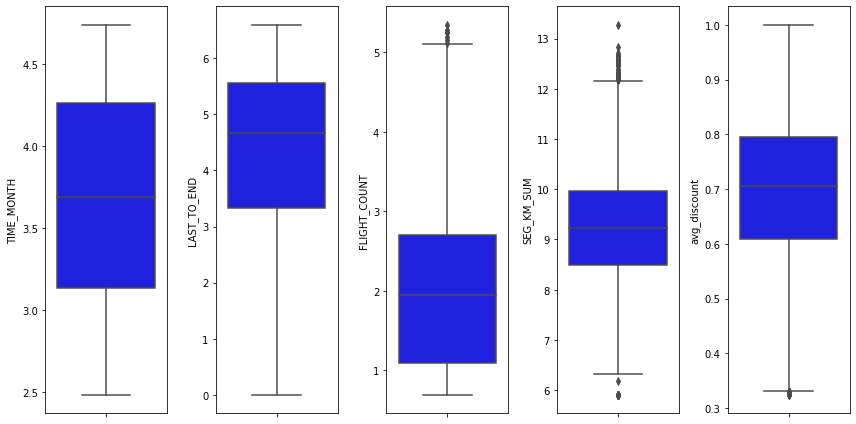

In [51]:
# Cek Boxplot after processing outlier
plt.figure(figsize=(12, 6))
for i in range(len(lrfmc)):
    plt.subplot(1, len(lrfmc), i+1)
    sns.boxplot(y=dfgo_feat[lrfmc[i]], color='blue', orient='v')
    plt.tight_layout()

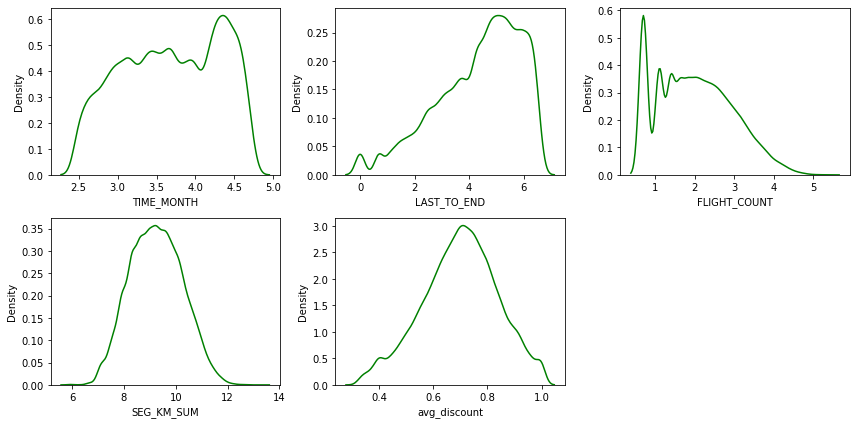

In [52]:
# Melihat sebaran data setelah processing outlier
plt.figure(figsize=(12, 6))
for i in range(0, len(lrfmc)):
  plt.subplot(2, 3, i+1) # len(features), i+1
  sns.kdeplot(x=dfgo_feat[lrfmc[i]], color = 'green')
  plt.xlabel(lrfmc[i])
  plt.tight_layout()

Sebaran data diatas adalah sebaran data "Terbaik" yang berhasil dibentuk

In [53]:
dfgo_feat.sample(10)

TIME_MONTH  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
39388    3.663587     5.293310      1.386544    8.850661      0.686570
60451    2.772651     4.615130      1.098946    8.082403      0.363333
59500    3.912043     4.343818      0.693647    7.884953      0.505337
8488     3.332240     4.343818      2.944492   10.492801      0.682160
17450    4.454359     0.693647      2.772651    9.795067      0.778971
27808    3.332240     6.023450      1.609638    9.152076      0.878705
23483    3.850169     4.828322      2.708117    9.841612      0.548028
20606    4.584978     2.302685      2.890427    9.666879      0.753248
57369    2.833272     6.272879      0.693647    8.331827      0.400000
13724    2.484990     3.737693      2.484990    9.933338      0.833015

# Clustering with K-Means

In [54]:
data_std = StandardScaler().fit_transform(dfgo_feat)
dfgo_std = pd.DataFrame(data=data_std, columns = lrfmc)
dfgo_std

TIME_MONTH  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount
0        1.296328    -2.817974      3.538403    4.007522      1.894154
1        0.651695    -1.775012      3.195806    3.382750      1.959232
2        0.985121     0.014321      2.663626    3.332233      1.937834
3        1.415411    -2.817974      2.762551    3.306424      1.920907
4        0.296929    -2.106119      2.418436    3.307075      1.897265
...           ...          ...           ...         ...           ...
54778   -0.347697     1.200168     -1.393962   -3.319448      0.367003
54779    1.658147     0.766391     -1.393962   -3.319448      0.367003
54780   -1.661955     1.091379     -1.393962   -3.319448      0.367003
54781    0.754302     1.094489     -1.393962   -3.319448      0.367003
54782   -1.907018     0.992215     -1.393962   -2.597854     -2.519327

[54783 rows x 5 columns]

In [55]:
dfgo_std.describe()

TIME_MONTH   LAST_TO_END  FLIGHT_COUNT    SEG_KM_SUM  avg_discount
count  5.478300e+04  5.478300e+04  5.478300e+04  5.478300e+04  5.478300e+04
mean  -1.326241e-15  3.169927e-14  2.349026e-13 -6.119462e-15  2.912581e-15
std    1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00  1.000009e+00
min   -1.907018e+00 -2.817974e+00 -1.393962e+00 -3.319448e+00 -2.703884e+00
25%   -8.727230e-01 -6.581611e-01 -9.643720e-01 -7.400917e-01 -6.499494e-01
50%    7.065632e-03  2.049288e-01 -6.649427e-02 -1.484605e-02  4.187086e-02
75%    9.193241e-01  7.866531e-01  7.412429e-01  7.177402e-01  6.901487e-01
max    1.672155e+00  1.456872e+00  3.538403e+00  4.007522e+00  2.170960e+00

In [56]:
inertia = []

for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
  kmeans.fit(dfgo_std.values)
  inertia.append(kmeans.inertia_)

<AxesSubplot:>

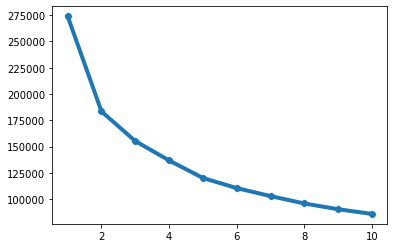

In [57]:
sns.lineplot(x=range(1,11), y=inertia, linewidth=4)
sns.scatterplot(x=range(1,11), y=inertia, s=58)

In [58]:
pd.Series(inertia) - pd.Series(inertia).shift(-1)

0    90525.310000
1    28143.996708
2    18443.841919
3    16641.430828
4     9613.630863
5     7601.269215
6     7015.543842
7     5482.624934
8     4430.628859
9             NaN
dtype: float64

Berdasarkan elbow method, jumlah cluster efisien di 3 cluster. Akan tetapi, dari visualisasinya belum meyakinkan soal pemilihan clusternya. Oleh sebab itu, akan dilakukan visualisasi distortion score dan shilouette score elbow untuk menentukan jumlah cluster yang tepat.

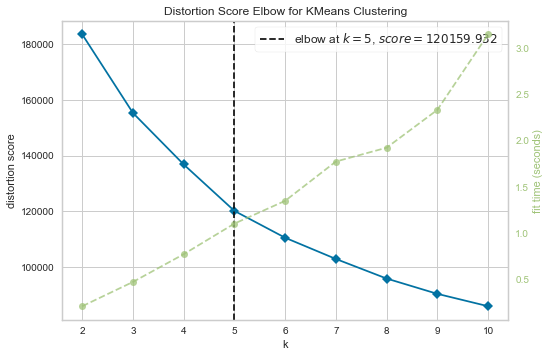

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [59]:
# visualisasi innertia vs k dengan parameter distortion
from yellowbrick.cluster import KElbowVisualizer

# fit model
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,11), metric='distortion', timings=True, locate_elbow=True)
visualizer.fit(dfgo_std)       
visualizer.show() 

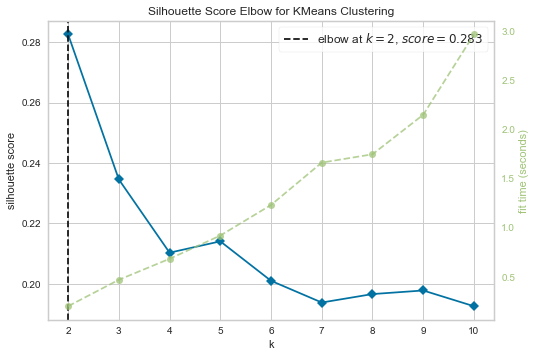

<AxesSubplot:title={'center':'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [60]:
model = KMeans(random_state=42)
visualizer = KElbowVisualizer(model, k=(2,11), metric='silhouette', timings=True, locate_elbow=True)
visualizer.fit(dfgo_std)        
visualizer.show()

Pada visualisasi distortion score dan shilouette score, nilai k atau n_cluster yang diperoleh berbeda, sehingga kita akan membandingkan nilai average shilouette score pada range 2 sampai 5.

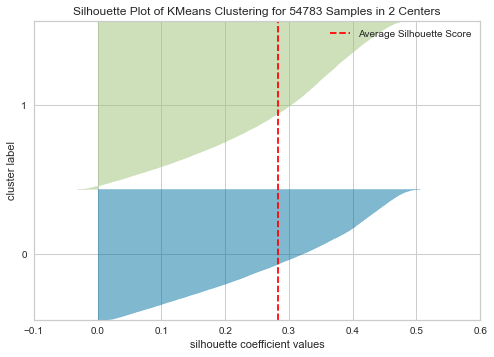

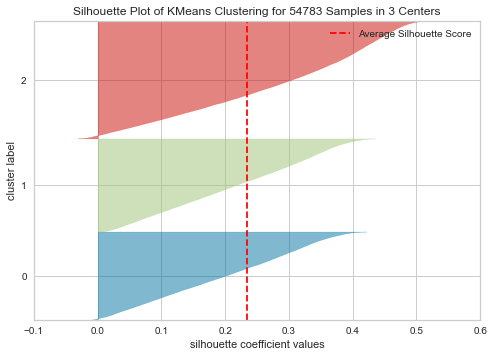

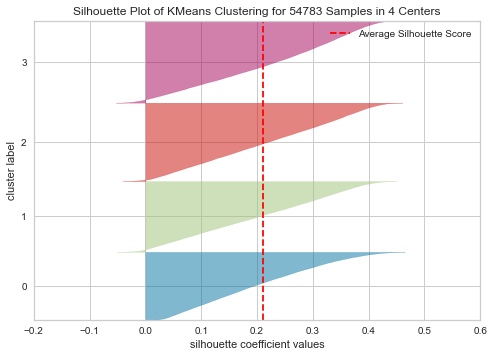

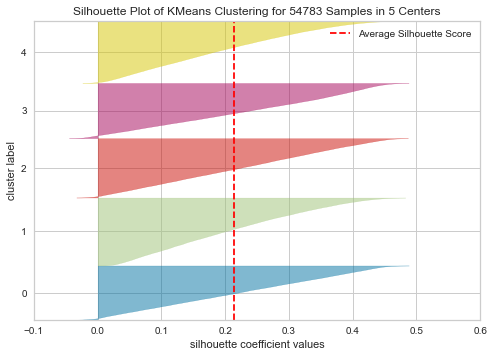

In [61]:
# silhouette plot
from yellowbrick.cluster import SilhouetteVisualizer

for i in [2,3,4,5]:
    model = KMeans(i, random_state=42)
    visualizer = SilhouetteVisualizer(model, colors='yellowbrick')
    visualizer.fit(dfgo_std)        
    visualizer.show()

In [62]:
from sklearn.metrics import silhouette_score
for num_clusters in [2,3,4,5]:
    #inisialisasi kmeans
    model_clus = KMeans(n_clusters = num_clusters, max_iter = 1000, random_state = 42)
    model_clus.fit(dfgo_std)
    
    cluster_labels = model_clus.labels_
    
    #shilhouette score
    silhouette_avg = silhouette_score(dfgo_std, cluster_labels)
    print("For n_clusters = {0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters = 2, the silhouette score is 0.2825605672062411
For n_clusters = 3, the silhouette score is 0.2345352812857464
For n_clusters = 4, the silhouette score is 0.21029068939003048
For n_clusters = 5, the silhouette score is 0.21405154698089732


Dari hasil output di atas, jumlah cluster yang memiliki komposisi yang seimbang dengan setiap anggota cluster dan memperhatikan average shilouette score dari masing-masing cluster adalah 4 cluster. Walaupun 5 cluster memiliki average shilouette score yang lebih tinggi dibandingkan 4 cluster, 5 cluster memiliki komposisi tiap anggota cluster yang lebih sedikit dibandingkan dengan 4 cluster, sehingga model ini lebih efisien jika cluster yang digunakan adalah 4 cluster

In [89]:
#kmeans = KMeans(n_clusters = 4, max_iter = 1000, algorithm = 'elkan', random_state = 42)
kmeans = KMeans(n_clusters = 4, max_iter = 300, random_state = 42)
kmeans.fit(dfgo_std.values)

KMeans(n_clusters=4, random_state=42)

In [90]:
#Menampilkan label ke dataset
dfgo_std['label'] = kmeans.labels_
dfgo_std

TIME_MONTH  LAST_TO_END  FLIGHT_COUNT  SEG_KM_SUM  avg_discount  label
0        1.296328    -2.817974      3.538403    4.007522      1.894154      2
1        0.651695    -1.775012      3.195806    3.382750      1.959232      2
2        0.985121     0.014321      2.663626    3.332233      1.937834      2
3        1.415411    -2.817974      2.762551    3.306424      1.920907      2
4        0.296929    -2.106119      2.418436    3.307075      1.897265      2
...           ...          ...           ...         ...           ...    ...
54778   -0.347697     1.200168     -1.393962   -3.319448      0.367003      3
54779    1.658147     0.766391     -1.393962   -3.319448      0.367003      3
54780   -1.661955     1.091379     -1.393962   -3.319448      0.367003      3
54781    0.754302     1.094489     -1.393962   -3.319448      0.367003      3
54782   -1.907018     0.992215     -1.393962   -2.597854     -2.519327      0

[54783 rows x 6 columns]

In [91]:
#PCA - split
X = dfgo_std.copy().drop(['label'], axis = 1)
Y = dfgo_std['label'].copy()

In [92]:
scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)

In [93]:
#PCA
pca = PCA(n_components = 2)
pca.fit(X_std)
X_pca = pca.transform(X_std)

pdf = pd.DataFrame(X_pca, columns = ['1', '2'])
pdf['label'] = Y
pdf.sample(5)

1         2  label
51624 -1.931775 -1.620259      3
43273 -2.280904  0.271682      3
17359  0.621228  0.924121      1
36123 -1.353663  0.656963      0
22563  0.390142 -1.421616      3

In [94]:
pdf.describe()

1             2         label
count  5.478300e+04  5.478300e+04  54783.000000
mean   5.783503e-15 -9.025591e-17      1.433018
std    1.552467e+00  1.008875e+00      1.117090
min   -3.649351e+00 -3.179294e+00      0.000000
25%   -1.213490e+00 -6.816991e-01      1.000000
50%   -1.242341e-01 -2.768355e-03      1.000000
75%    1.081889e+00  6.756587e-01      3.000000
max    6.307129e+00  3.302354e+00      3.000000

In [95]:
pdf.groupby('label').agg(['mean', 'median', 'std', 'count'])

1                                    2                      \
           mean    median       std  count      mean    median       std   
label                                                                      
0     -1.215342 -1.190803  0.797192  12693  0.941002  0.884314  0.721519   
1      0.749594  0.752920  0.703051  20438  0.076088  0.065926  0.803862   
2      2.655066  2.553642  0.697456   6889  0.054931  0.046214  0.741988   
3     -1.231769 -1.228394  0.794584  14763 -0.940029 -0.888888  0.723582   

              
       count  
label         
0      12693  
1      20438  
2       6889  
3      14763

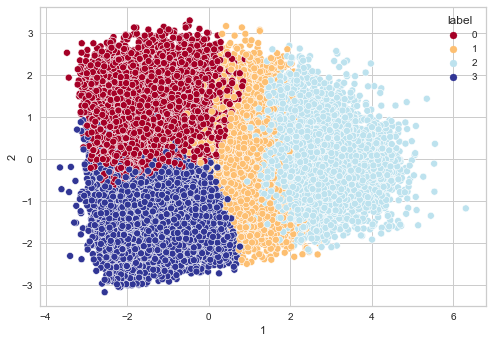

In [96]:
sns.scatterplot(data=pdf, x='1', y='2', hue='label', palette='RdYlBu')
plt.show()

In [97]:
print(abs(pca.components_))

[[0.21012478 0.48010006 0.60682803 0.59116396 0.08738662]
 [0.43175628 0.17499634 0.02936798 0.1108952  0.87738394]]


In [98]:
dfgo_std.columns

Index(['TIME_MONTH', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM',
       'avg_discount', 'label'],
      dtype='object')

Dari masing-masing fitur berkaitan dengan model L(Loyalty), R(Recency), F(Frequency), M(Monetery), dan C(Discount) sebagai berikut:
- L : 'TIME_MONTH'
- R : 'LAST_TO_END'
- F : 'FLIGHT_COUNT'
- M : 'SEG_KM_SUM'
- C : 'avg_discount'

### PC1 top feature
- 'FLIGHT_COUNT' : Total berapa kali passenger telah terbang selama periode observasi.
- 'SEG_KM_SUM' : Miles atau jarak yang terakumulasi selama waktu observasi passenger.
- 'LAST_TO_END' : Jumlah bulan sejak penerbangan terakhir passenger dari akhir waktu observasi.
- 'TIME_MONTH' : Lama waktu passenger menjadi membership (dalam bulan) dalam diketahui dari selisih dari waktu observasi dengan waktu menjadi menjadi membership.
- 'avg_discount' : Nilai rata-rata discount factor yang digunakan passenger selama periode observasi.

### PC2 top feature
- 'avg_discount' : Nilai rata-rata discount factor yang digunakan passenger selama periode observasi.
- 'TIME_MONTH' : Lama waktu passenger menjadi membership (dalam bulan) dalam diketahui dari selisih dari waktu observasi dengan waktu menjadi menjadi membership.
- 'LAST_TO_END' : Jumlah bulan sejak penerbangan terakhir passenger dari akhir waktu observasi.
- 'SEG_KM_SUM' : Miles atau jarak yang terakumulasi selama waktu observasi passenger.
- 'FLIGHT_COUNT' : Total berapa kali passenger telah terbang selama periode observasi.

## Statistical Summary Hasil Clustering

In [99]:
# Mengembalikan ke data aslinya sebelum dilakukan log transformasi
list_log = ['TIME_MONTH', 'LAST_TO_END', 'FLIGHT_COUNT', 'SEG_KM_SUM']

for i in list_log:
    dfgo_feat[i] = np.exp(dfgo_feat[i])
    dfgo_feat[i] = dfgo_feat[i] - 0.001

In [100]:
# mengganti nama feature
dfgo_feat.columns =['L', 'R', 'F', 'M', 'C']
dfgo_feat

L      R      F         M         C
0       90.0    1.0  210.0  580717.0  0.961639
4       60.0    5.0  152.0  309928.0  0.970658
5       74.0   79.0   92.0  294585.0  0.967692
6       97.0    1.0  101.0  287042.0  0.965347
7       48.0    3.0   73.0  287230.0  0.962070
...      ...    ...    ...       ...       ...
62962   32.0  492.0    2.0     368.0  0.750000
62963  113.0  252.0    2.0     368.0  0.750000
62964   14.0  416.0    2.0     368.0  0.750000
62965   64.0  418.0    2.0     368.0  0.750000
62973   12.0  357.0    2.0     760.0  0.350000

[54783 rows x 5 columns]

In [101]:
dfgo_feat['label'] = kmeans.labels_
dfgo_feat.groupby('label').agg(['mean', 'median', 'std'])

L                             R                             F  \
            mean median        std        mean median         std       mean   
label                                                                          
0      42.829749   36.0  25.585817  250.375167  205.0  188.075646   4.134011   
1      47.313583   38.5  28.636732   90.988893   64.0   92.476246  13.854046   
2      59.257657   55.0  27.349370   11.961823    8.0   14.409742  37.548701   
3      47.862223   41.0  27.399385  293.543047  253.0  194.463156   3.979408   

                                    M                                C  \
      median        std          mean   median           std      mean   
label                                                                    
0        4.0   2.192462   6497.739857   5506.0   4126.954271  0.534159   
1       12.0   7.258350  20582.663861  17466.5  12592.203023  0.708401   
2       33.0  21.459622  51373.108579  44137.0  32956.729115  0.736333   
3        3.0   2.162760   5331.111563   4513.0   3569.871163  0.810808   

                           
         median       std  
label                      
0      0.546655  0.088757  
1      0.707820  0.102547  
2      0.735097  0.098578  
3      0.800000  0.093643

In [102]:
# persentase customer setiap cluster
cluster_count = dfgo_feat['label'].value_counts().reset_index()
cluster_count.columns = ['label', 'count']
cluster_count['percentage (%)'] = round((cluster_count['count']/len(dfgo_std))*100,2)
cluster_count = cluster_count.sort_values(by=['label']).reset_index(drop=True)
cluster_count

label  count  percentage (%)
0      0  12693           23.17
1      1  20438           37.31
2      2   6889           12.58
3      3  14763           26.95

Text(0, 0.5, 'Percentage')

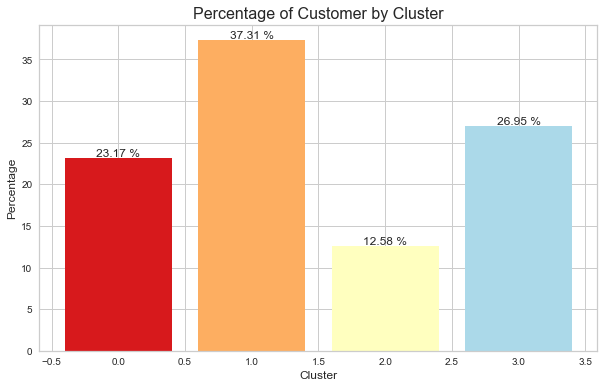

In [103]:
#visualisasi persentase customer pada setiap cluster
fig, ax = plt.subplots(figsize=(10,6))

c = ["#d7191c","#fdae61","#ffffbf","#abd9e9","#2c7bb6"]
bars = plt.bar(x=cluster_count['label'], height= cluster_count['percentage (%)'],color=c)

for bar in bars:
  height = bar.get_height()
  label_x_pos = bar.get_x() + bar.get_width() / 2
  ax.text(label_x_pos, height, s=f'{height} %', ha='center',
  va='bottom')
plt.title('Percentage of Customer by Cluster', fontsize=16)
plt.xlabel('Cluster',fontsize=12)
plt.ylabel('Percentage',fontsize=12)

Text(0, 0.5, 'Value')

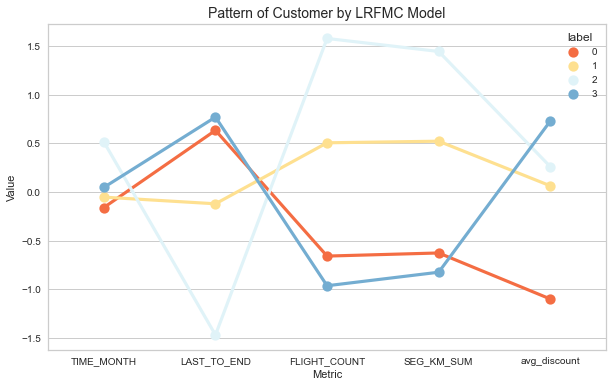

In [107]:
# melihat pola LRFMC pada setiap cluster
cluster_med=dfgo_std.groupby('label').median().reset_index()

df_melt = pd.melt(cluster_med.reset_index(), id_vars='label', value_vars=lrfmc, var_name='Metric', value_name='Value')
plt.figure(figsize=(10,6))
sns.pointplot(data=df_melt, x='Metric', y='Value', hue='label', palette='RdYlBu')
plt.title('Pattern of Customer by LRFMC Model', fontsize=14)
plt.xlabel('Metric')
plt.ylabel('Value')

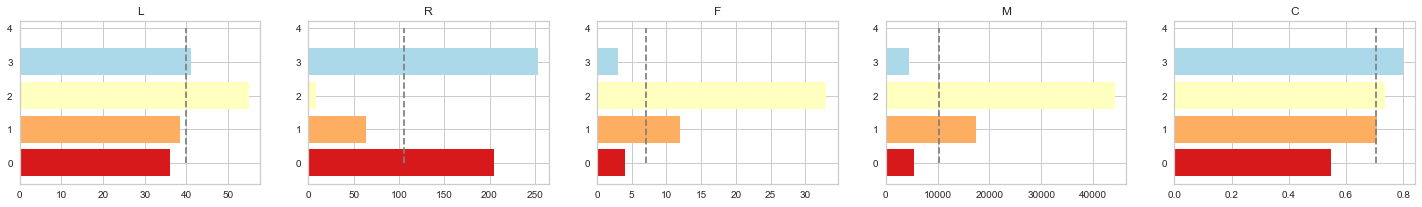

In [108]:
# melihat rata-rata variabel LRFMC antar cluster
LRFMC= ['L','R','F','M','C']
def dist_list(lst):
    plt.figure(figsize=[len(lst)*5,3])
    i = 1
    for col in lst:
        ax = plt.subplot(1,len(lst),i)
        ax.vlines(dfgo_feat[col].median(), ymin=0, ymax=4, color='grey', linestyle='--')
        g = dfgo_feat.groupby('label')
        x = g[col].median().index
        y = g[col].median().values
        ax.barh(x,y, color=c) 
        plt.title(col)
        i = i+1
        
dist_list(LRFMC)

Secara keseluruhan cluster-cluster ini terbentuk karena adanya penbedaan indikaror model LRFMC. Berdasarkan hasil analisis dan visualisai dapat diketahui karakteristik customer pada setiap kelompok sebagai berikut:

<p style="text-align: center;">
Tabel - Akumulasi Hasil Nilai LRFMC pada Setiap Cluster
</p> 

|  Cluster  | High Value | Average Value | Low Value |
| :-------- | :--------: | :-----------: | :-------: |
| **Cluster 0** | R |  | L F M C |
| **Cluster 1** |  | L F M C | R |
| **Cluster 2** | L F M | C | R |
| **Cluster 3** | R C | L | F M |

# Interpretasi Cluster
- Cluster 0 : Kelompok new passenger yang penggunaan maskapainya rendah, baru menjadi membership, penggunaan diskon yang rendah, dan jarak tempuh perjalanan yang dilakukan juga terbilang masih kecil.

- Cluster 1 : Kelompok passenger menengah (potential loyal passenger) dengan lama membership, frekuensi penggunaan maskapai, jarak tempuh perjalanan, dan penggunaan diskon yang terbilang tidak tinggi dan juga tidak rendah (menengah), serta rentang waktu dari waktu penerbangan terakhir dengan pesanan terakhir yang dilakukan cukup rendah.

- Cluster 2 : Kelompok loyal passenger dengan membership di maskapai yang sudah cukup lama, sering meggunakan maskapai, dan jarak tempuh perjalanan yang dilakukan sudah sangat tinggi. Walaupun penggunaan diskon yang tergolong menengah, recency/rentang waktu dari waktu penerbangan terakhir dengan pesanan terakhir yang dilakukan rendah.

- Cluster 3 : Kelompok passenger menengah dengan lama membership di maskapai menengah (tidak baru dan tidak lama juga sejak terhitung bergabung untuk menggunakan maskapai), penggunaan diskon yang cukup tinggi pada kelompok passenger ini dengan rentang waktu dari waktu penerbangan terakhir dengan pesanan terakhir yang dilakukan cukup tinggi, serta aktivitas penggunaan maskapai rendah dan jarak tempuh perjalanannya pun masih rendah (Kemungkinan kelompok passenger ini menggunakan maskapai jika ada promo. Jika tidak ada promo, maka kemungkinan tidak melakukan transaksi di maskapai).

# Rekomendasi Bisnis
- Cluster 0 : Membutuhkan treat lebih bagus lagi agar kelompok ini bisa lebih lama menjadi member di maskapai dan lebih sering menggunakan maskapai. Perlakuan yang bisa diberikan untuk kelompok ini adalah bisa berupa pengiriman personalisasi campaign atau promo berbagai program penerbangan dalam maskapai yang dikirim melalui email pribadi passenger.
- Cluster 1 : Menggunakan maskapai dengan jarak tempuh menengah dengan rentang waktu penerbangan terakhir dan waktu pesanan terakhir yang berdekatan, memungkinkan kelompok ini jika diberikan perlakuan lebih lagi akan tetap menggunakan maskapai, recency tetap rendah, serta menjadikan frekuensi transaksi dan jarak tempuhnya meningkat. Dengan begitu, kelompok passenger ini bisa menjadi loyal passenger. Rekomendasi yang bisa diberikan, yaitu dengan pemberian potongan harga apabila passenger melakukan penerbangan lebih dari satu penerbangan dalam satu waktu dan/atau mengajak teman/rekan dalam penerbangan yang sama serta pemberian poin setiap penerbangan yang bisa ditukar menjadi voucher khusus jika poin yang terkumpul sudah memenuhi ketentuan yang ada.
- Cluster 2 : Kelompok ini sudah lama menggunakan maskapai dengan transaksi yang lumayan banyak dan jarak tempuh perjalanan yang cukup tinggi. Kelompok ini harus diberikan perlakuan agar mereka merasa bahwa maskapai menghargai keloyalitasan mereka. Rekomendasi yang diberikan bisa berupa pengiriman ucapan terima kasih sudah menggunakan maskapai dengan setia ke email pribadi dan juga bisa berupa pemberian poin yang bisa ditukarkan dengan voucher diskon dan/atau penawaran produk afiliasi dari maskapai.
- Cluster 3 : Cukup jarang menggunakan maskapai dan jarak tempuh yang masih sedikit dengan lama membership yang cukup sedang serta kelompok ini senang melakukan transaksi jika ada diskon yang diberikan. Rekomendasi yang bisa diberikan adalah pengiriman email pribadi berupa bentuk kerinduan maskapai atas transaksi yang dilakukan dan berupa pengiriman kode voucher promo berupa diskon untuk penerbangan mendatang dalam batas waktu tertentu agar passenger ini bisa segera mereedem voucher tersebut.